In [36]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

In [37]:
# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [6]:
!pip install tensorflow

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

In [39]:
#plotting
import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [64]:
df=pd.read_csv("BTC-USD.csv")

In [41]:
df

Date          Open          High           Low         Close  \
0     2014-09-17    465.864014    468.174011    452.421997    457.334015   
1     2014-09-18    456.859985    456.859985    413.104004    424.440002   
2     2014-09-19    424.102997    427.834991    384.532013    394.795990   
3     2014-09-20    394.673004    423.295990    389.882996    408.903992   
4     2014-09-21    408.084991    412.425995    393.181000    398.821014   
...          ...           ...           ...           ...           ...   
3574  2024-06-30  60888.445313  62892.828125  60632.949219  62678.292969   
3575  2024-07-01  62673.605469  63777.226563  62495.511719  62851.980469   
3576  2024-07-02  62844.410156  63203.359375  61752.746094  62029.015625   
3577  2024-07-03  62034.332031  62187.703125  59419.386719  60173.921875   
3578  2024-07-04  60147.136719  60396.890625  57998.082031  57998.082031   

         Adj Close       Volume  
0       457.334015     21056800  
1       424.440002     34483200  
2       394.795990     37919700  
3       408.903992     36863600  
4       398.821014     26580100  
...            ...          ...  
3574  62678.292969  17333226409  
3575  62851.980469  25468379421  
3576  62029.015625  20151616992  
3577  60173.921875  29756701685  
3578  57998.082031  35476762624  

[3579 rows x 7 columns]

In [42]:
df.head()

Date        Open        High         Low       Close   Adj Close  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100

In [43]:
print("Total number of days present in dataset:",df.shape[0])
print("Total number of fields present in the dataset:",df.shape[1])

Total number of days present in dataset: 3579
Total number of fields present in the dataset: 7


In [44]:
df.shape

(3579, 7)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3579 entries, 0 to 3578
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3579 non-null   object 
 1   Open       3579 non-null   float64
 2   High       3579 non-null   float64
 3   Low        3579 non-null   float64
 4   Close      3579 non-null   float64
 5   Adj Close  3579 non-null   float64
 6   Volume     3579 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 195.9+ KB


In [46]:
df.describe()

Open          High           Low         Close     Adj Close  \
count   3579.000000   3579.000000   3579.000000   3579.000000   3579.000000   
mean   16910.465457  17296.261910  16497.574866  16925.343047  16925.343047   
std    18802.581314  19227.012873  18334.033821  18810.986298  18810.986298   
min      176.897003    211.731003    171.509995    178.102997    178.102997   
25%     1052.405029   1079.729981   1037.085022   1054.325012   1054.325012   
50%     8852.780273   9081.279297   8677.316406   8864.766602   8864.766602   
75%    27796.959961  28336.328125  27253.883789  27808.447265  27808.447265   
max    73079.375000  73750.070313  71334.093750  73083.500000  73083.500000   

             Volume  
count  3.579000e+03  
mean   1.731818e+10  
std    1.917512e+10  
min    5.914570e+06  
25%    2.510190e+08  
50%    1.328114e+10  
75%    2.790441e+10  
max    3.509679e+11

In [47]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [48]:
df.shape

(3579, 7)

In [49]:
sd=df.iloc[0][0]
ed=df.iloc[-1][0]
print("Starting date:",sd)
print("End date:",ed)

Starting date: 2014-09-17
End date: 2024-07-04


C:\Users\89339\AppData\Local\Temp\ipykernel_29136\1282837128.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\89339\AppData\Local\Temp\ipykernel_29136\1282837128.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



# Analysis of 2014

In [60]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Convert the 'Date' column to numpy array to avoid future warnings
df['Date'] = np.array(df['Date'], dtype='datetime64')

# Filter data for the year 2014
y_2014 = df.loc[(df['Date'] >= '2014-09-17') & (df['Date'] < '2014-12-31')]
y_2014 = y_2014.drop(columns=['Adj Close', 'Volume'])

In [51]:
monthwise=y_2014.groupby(y_2014['Date'].dt.strftime ('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
monthwise=monthwise.reindex(new_order,axis=0)

In [52]:
monthwise

Open       Close
Date                             
January           NaN         NaN
February          NaN         NaN
March             NaN         NaN
April             NaN         NaN
May               NaN         NaN
June              NaN         NaN
July              NaN         NaN
August            NaN         NaN
September  412.654003  407.182428
October    365.748000  364.148873
November   364.850235  366.099799
December   344.146864  341.970366

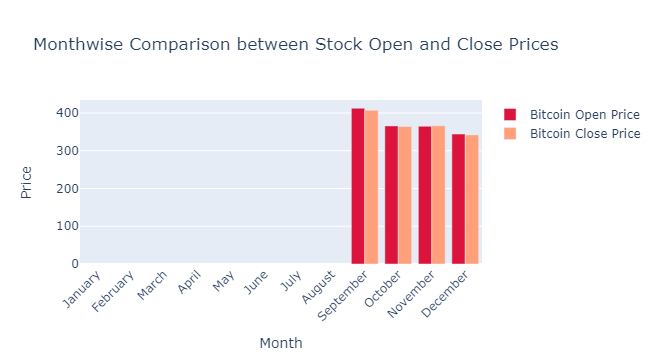

In [53]:
# Create the figure
fig = go.Figure()

# Add trace for stock open prices
fig.add_trace(go.Bar(
    x=monthwise.index,
    y=monthwise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))

# Add trace for stock close prices
fig.add_trace(go.Bar(
    x=monthwise.index,
    y=monthwise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

# Update layout for better visualization
fig.update_layout(
    barmode='group',
    xaxis_tickangle=-45,
    title='Monthwise Comparison between Stock Open and Close Prices',
    xaxis_title='Month',
    yaxis_title='Price'
)

# Show the plot
fig.show()

In [54]:
monthwise_high = y_2014.groupby(y_2014['Date'].dt.strftime('%B'))['High'].max()
monthwise_low = y_2014.groupby(y_2014['Date'].dt.strftime('%B'))['Low'].min()


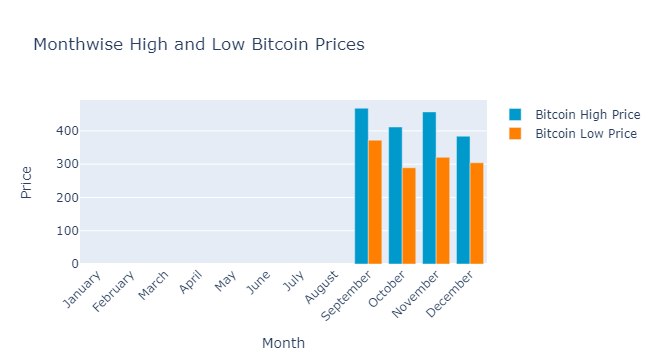

In [55]:
monthwise_high = monthwise_high.reindex(new_order)
monthwise_low = monthwise_low.reindex(new_order)

# Create the figure
fig = go.Figure()

# Add trace for monthly high prices
fig.add_trace(go.Bar(
    x=monthwise_high.index,
    y=monthwise_high,
    name='Bitcoin High Price',
    marker_color='rgb(0, 153, 204)'
))

# Add trace for monthly low prices
fig.add_trace(go.Bar(
    x=monthwise_low.index,
    y=monthwise_low,
    name='Bitcoin Low Price',
    marker_color='rgb(255, 128, 0)'
))

# Update layout for better visualization
fig.update_layout(
    barmode='group',
    title='Monthwise High and Low Bitcoin Prices',
    xaxis_title='Month',
    yaxis_title='Price',
    xaxis_tickangle=-45
)

# Show the plot
fig.show()

In [56]:
names = cycle(['Bitcoin Open Price', 'Bitcoin Close Price', 'Bitcoin High Price', 'Bitcoin Low Price'])

C:\Users\89339\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



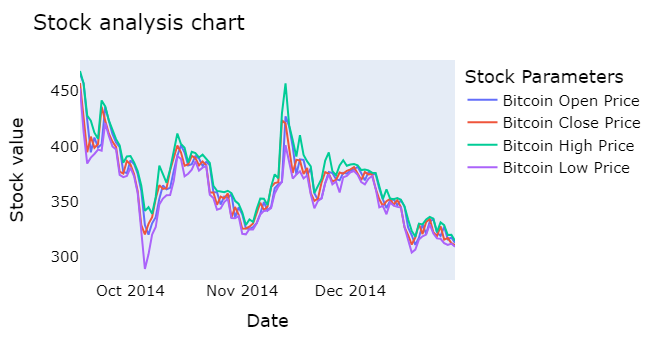

In [62]:
fig = px.line(y_2014, x='Date', y=['Open', 'Close', 'High', 'Low'],
              labels={'Date': 'Date', 'value': 'Stock value'})
fig.update_layout(
    title_text='Stock analysis chart',
    font_size=15,
    font_color='black',
    legend_title_text='Stock Parameters'
)

# Update the trace names
fig.for_each_trace(lambda t: t.update(name=next(names)))

# Update the axes to hide the grid
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show the plot
fig.show()


# Analysis for 2015

In [73]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Convert the 'Date' column to numpy array to avoid future warnings
df['Date'] = np.array(df['Date'], dtype='datetime64')

# Filter data for the year 2014
y_2015 = df.loc[(df['Date'] >= '2015-01-01') & (df['Date'] < '2015-12-31')]
y_2015 = y_2015.drop(columns=['Adj Close', 'Volume'])

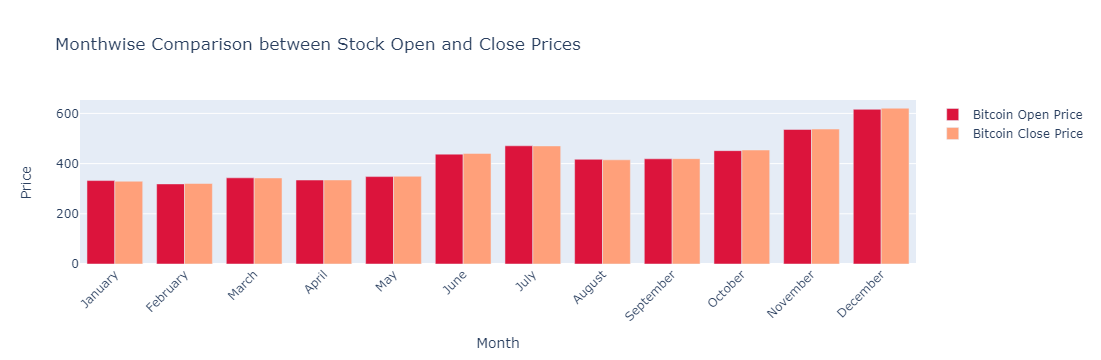

In [70]:
monthwise=y_2015.groupby(y_2015['Date'].dt.strftime ('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
monthwise=monthwise.reindex(new_order,axis=0)
fig = go.Figure()

# Add trace for stock open prices
fig.add_trace(go.Bar(
    x=monthwise.index,
    y=monthwise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))

# Add trace for stock close prices
fig.add_trace(go.Bar(
    x=monthwise.index,
    y=monthwise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

# Update layout for better visualization
fig.update_layout(
    barmode='group',
    xaxis_tickangle=-45,
    title='Monthwise Comparison between Stock Open and Close Prices',
    xaxis_title='Month',
    yaxis_title='Price'
)

# Show the plot
fig.show()

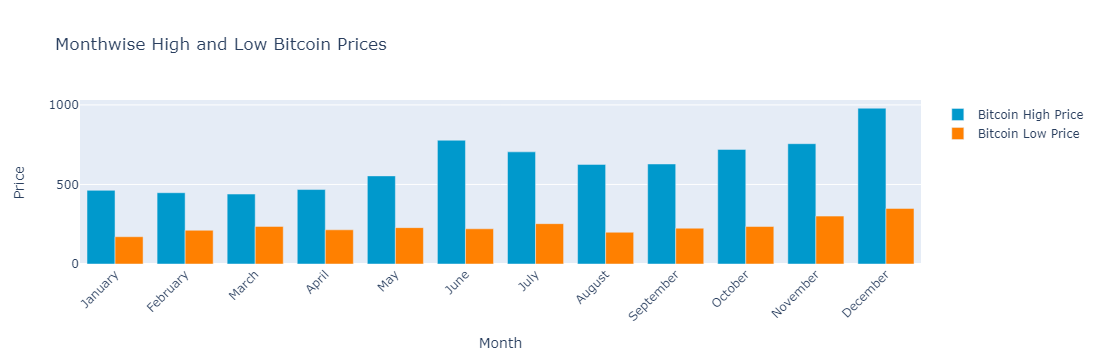

In [71]:
monthwise_high = y_2015.groupby(y_2015['Date'].dt.strftime('%B'))['High'].max()
monthwise_low = y_2015.groupby(y_2015['Date'].dt.strftime('%B'))['Low'].min()
monthwise_high = monthwise_high.reindex(new_order)
monthwise_low = monthwise_low.reindex(new_order)

# Create the figure
fig = go.Figure()

# Add trace for monthly high prices
fig.add_trace(go.Bar(
    x=monthwise_high.index,
    y=monthwise_high,
    name='Bitcoin High Price',
    marker_color='rgb(0, 153, 204)'
))

# Add trace for monthly low prices
fig.add_trace(go.Bar(
    x=monthwise_low.index,
    y=monthwise_low,
    name='Bitcoin Low Price',
    marker_color='rgb(255, 128, 0)'
))

# Update layout for better visualization
fig.update_layout(
    barmode='group',
    title='Monthwise High and Low Bitcoin Prices',
    xaxis_title='Month',
    yaxis_title='Price',
    xaxis_tickangle=-45
)

# Show the plot
fig.show()

C:\Users\89339\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



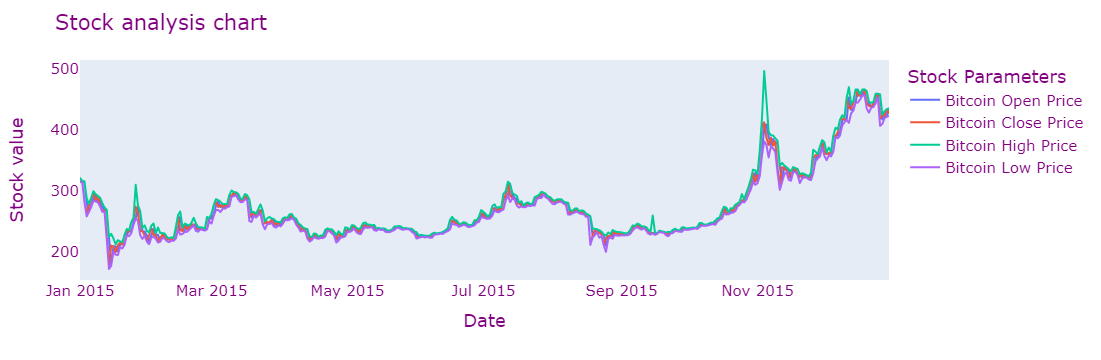

In [74]:
names = cycle(['Bitcoin Open Price', 'Bitcoin Close Price', 'Bitcoin High Price', 'Bitcoin Low Price'])
fig = px.line(y_2015, x='Date', y=['Open', 'Close', 'High', 'Low'],
              labels={'Date': 'Date', 'value': 'Stock value'})
fig.update_layout(
    title_text='Stock analysis chart',
    font_size=15,
    font_color='purple',
    legend_title_text='Stock Parameters'
)

# Update the trace names
fig.for_each_trace(lambda t: t.update(name=next(names)))

# Update the axes to hide the grid
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show the plot
fig.show()


# Analysis for 2016

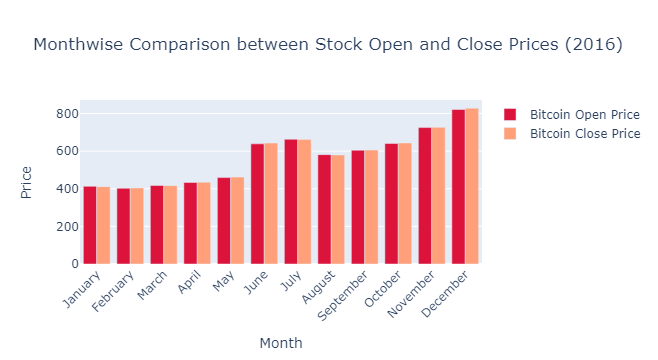

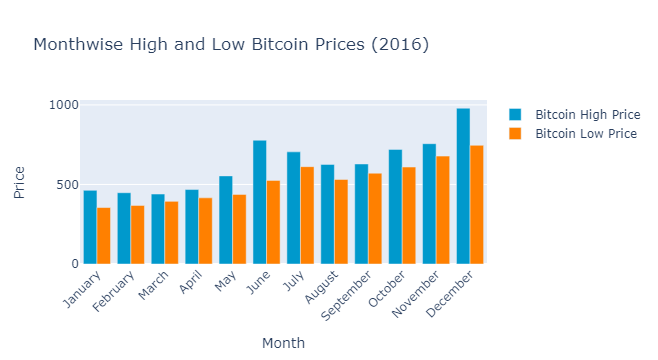

C:\Users\89339\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



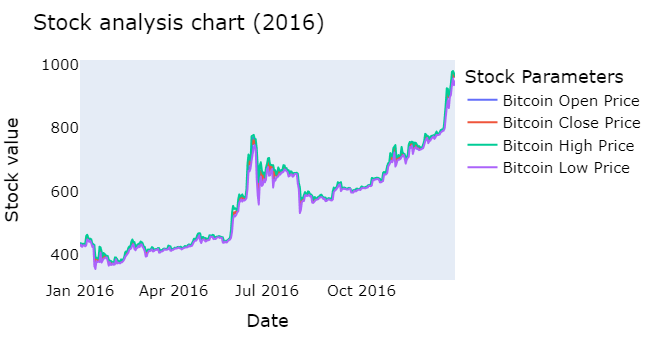

In [75]:
# Filter data for the year 2016
y_2016 = df.loc[(df['Date'] >= '2016-01-01') & (df['Date'] < '2017-01-01')]
y_2016 = y_2016.drop(columns=['Adj Close', 'Volume'])

# Convert the 'Date' column to numpy array to avoid future warnings
y_2016['Date'] = np.array(y_2016['Date'], dtype='datetime64')

# Group data by month and calculate mean for 'Open' and 'Close' prices
monthwise_2016 = y_2016.groupby(y_2016['Date'].astype(str).str[:7])[['Open', 'Close']].mean()
monthwise_2016.index = pd.to_datetime(monthwise_2016.index)
monthwise_2016.index = monthwise_2016.index.strftime('%B')
monthwise_2016 = monthwise_2016.reindex(new_order, axis=0)

# Create the figure for monthwise open and close prices
fig = go.Figure()

# Add trace for stock open prices
fig.add_trace(go.Bar(
    x=monthwise_2016.index,
    y=monthwise_2016['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))

# Add trace for stock close prices
fig.add_trace(go.Bar(
    x=monthwise_2016.index,
    y=monthwise_2016['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

# Update layout for better visualization
fig.update_layout(
    barmode='group',
    xaxis_tickangle=-45,
    title='Monthwise Comparison between Stock Open and Close Prices (2016)',
    xaxis_title='Month',
    yaxis_title='Price'
)

# Show the plot
fig.show()

# Group data by month and calculate max 'High' and min 'Low' prices
monthwise_high_2016 = y_2016.groupby(y_2016['Date'].astype(str).str[:7])['High'].max()
monthwise_low_2016 = y_2016.groupby(y_2016['Date'].astype(str).str[:7])['Low'].min()
monthwise_high_2016.index = pd.to_datetime(monthwise_high_2016.index)
monthwise_low_2016.index = pd.to_datetime(monthwise_low_2016.index)
monthwise_high_2016.index = monthwise_high_2016.index.strftime('%B')
monthwise_low_2016.index = monthwise_low_2016.index.strftime('%B')
monthwise_high_2016 = monthwise_high_2016.reindex(new_order)
monthwise_low_2016 = monthwise_low_2016.reindex(new_order)

# Create the figure for monthwise high and low prices
fig = go.Figure()

# Add trace for monthly high prices
fig.add_trace(go.Bar(
    x=monthwise_high_2016.index,
    y=monthwise_high_2016,
    name='Bitcoin High Price',
    marker_color='rgb(0, 153, 204)'
))

# Add trace for monthly low prices
fig.add_trace(go.Bar(
    x=monthwise_low_2016.index,
    y=monthwise_low_2016,
    name='Bitcoin Low Price',
    marker_color='rgb(255, 128, 0)'
))

# Update layout for better visualization
fig.update_layout(
    barmode='group',
    title='Monthwise High and Low Bitcoin Prices (2016)',
    xaxis_title='Month',
    yaxis_title='Price',
    xaxis_tickangle=-45
)

# Show the plot
fig.show()

# Create the names cycle
names = cycle(['Bitcoin Open Price', 'Bitcoin Close Price', 'Bitcoin High Price', 'Bitcoin Low Price'])

# Create the line plot for daily prices in 2016
fig = px.line(y_2016, x='Date', y=['Open', 'Close', 'High', 'Low'],
              labels={'Date': 'Date', 'value': 'Stock value'})

# Update layout for the line plot
fig.update_layout(
    title_text='Stock analysis chart (2016)',
    font_size=15,
    font_color='black',
    legend_title_text='Stock Parameters'
)

# Update the trace names
fig.for_each_trace(lambda t: t.update(name=next(names)))

# Update the axes to hide the grid
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show the plot
fig.show()


# Analysis for 2017

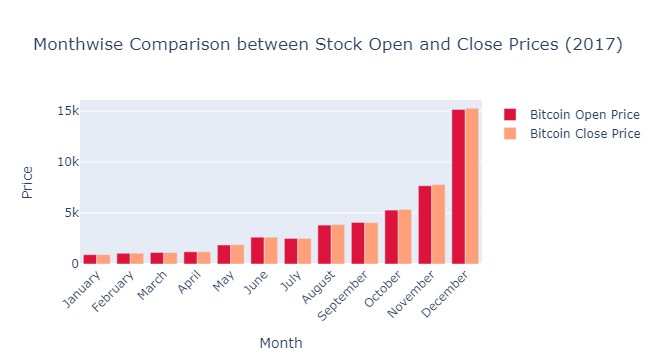

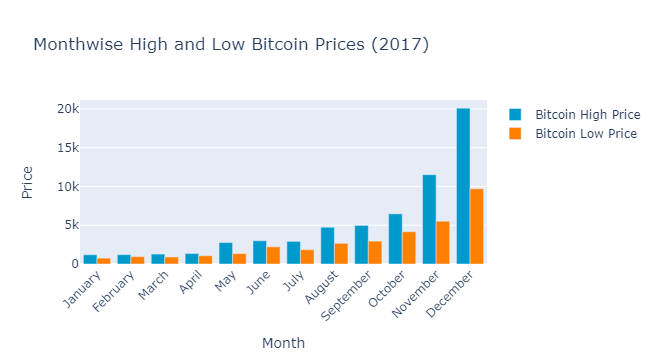

C:\Users\89339\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



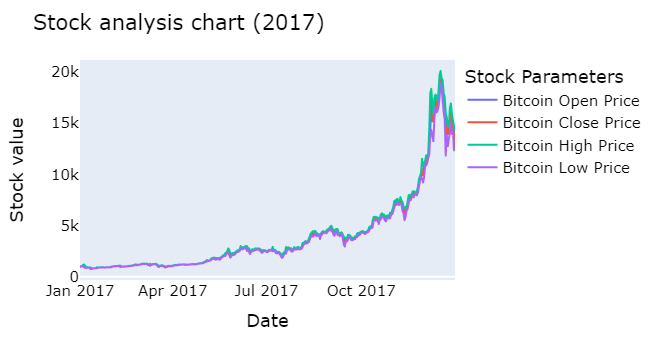

In [76]:
# Filter data for the year 2017
y_2017 = df.loc[(df['Date'] >= '2017-01-01') & (df['Date'] < '2018-01-01')]
y_2017 = y_2017.drop(columns=['Adj Close', 'Volume'])

# Convert the 'Date' column to numpy array to avoid future warnings
y_2017['Date'] = np.array(y_2017['Date'], dtype='datetime64')

# Group data by month and calculate mean for 'Open' and 'Close' prices
monthwise_2017 = y_2017.groupby(y_2017['Date'].astype(str).str[:7])[['Open', 'Close']].mean()
monthwise_2017.index = pd.to_datetime(monthwise_2017.index)
monthwise_2017.index = monthwise_2017.index.strftime('%B')
monthwise_2017 = monthwise_2017.reindex(new_order, axis=0)

# Create the figure for monthwise open and close prices
fig = go.Figure()

# Add trace for stock open prices
fig.add_trace(go.Bar(
    x=monthwise_2017.index,
    y=monthwise_2017['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))

# Add trace for stock close prices
fig.add_trace(go.Bar(
    x=monthwise_2017.index,
    y=monthwise_2017['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

# Update layout for better visualization
fig.update_layout(
    barmode='group',
    xaxis_tickangle=-45,
    title='Monthwise Comparison between Stock Open and Close Prices (2017)',
    xaxis_title='Month',
    yaxis_title='Price'
)

# Show the plot
fig.show()

# Group data by month and calculate max 'High' and min 'Low' prices
monthwise_high_2017 = y_2017.groupby(y_2017['Date'].astype(str).str[:7])['High'].max()
monthwise_low_2017 = y_2017.groupby(y_2017['Date'].astype(str).str[:7])['Low'].min()
monthwise_high_2017.index = pd.to_datetime(monthwise_high_2017.index)
monthwise_low_2017.index = pd.to_datetime(monthwise_low_2017.index)
monthwise_high_2017.index = monthwise_high_2017.index.strftime('%B')
monthwise_low_2017.index = monthwise_low_2017.index.strftime('%B')
monthwise_high_2017 = monthwise_high_2017.reindex(new_order)
monthwise_low_2017 = monthwise_low_2017.reindex(new_order)

# Create the figure for monthwise high and low prices
fig = go.Figure()

# Add trace for monthly high prices
fig.add_trace(go.Bar(
    x=monthwise_high_2017.index,
    y=monthwise_high_2017,
    name='Bitcoin High Price',
    marker_color='rgb(0, 153, 204)'
))

# Add trace for monthly low prices
fig.add_trace(go.Bar(
    x=monthwise_low_2017.index,
    y=monthwise_low_2017,
    name='Bitcoin Low Price',
    marker_color='rgb(255, 128, 0)'
))

# Update layout for better visualization
fig.update_layout(
    barmode='group',
    title='Monthwise High and Low Bitcoin Prices (2017)',
    xaxis_title='Month',
    yaxis_title='Price',
    xaxis_tickangle=-45
)

# Show the plot
fig.show()

# Create the names cycle
names = cycle(['Bitcoin Open Price', 'Bitcoin Close Price', 'Bitcoin High Price', 'Bitcoin Low Price'])

# Create the line plot for daily prices in 2017
fig = px.line(y_2017, x='Date', y=['Open', 'Close', 'High', 'Low'],
              labels={'Date': 'Date', 'value': 'Stock value'})

# Update layout for the line plot
fig.update_layout(
    title_text='Stock analysis chart (2017)',
    font_size=15,
    font_color='black',
    legend_title_text='Stock Parameters'
)

# Update the trace names
fig.for_each_trace(lambda t: t.update(name=next(names)))

# Update the axes to hide the grid
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show the plot
fig.show()


# 2018

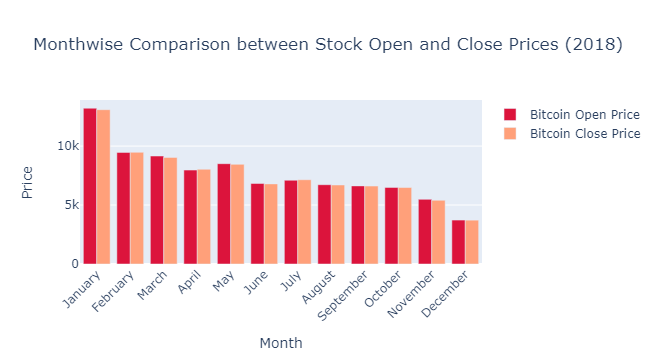

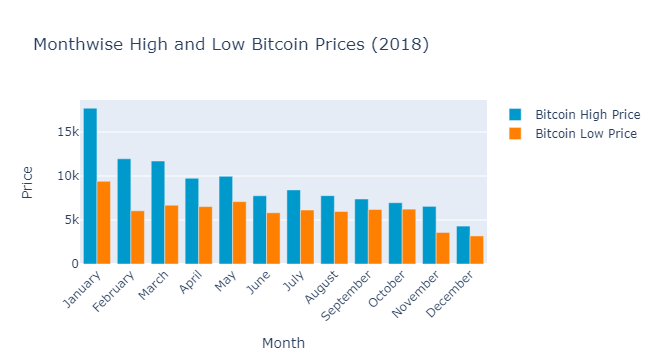

C:\Users\89339\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



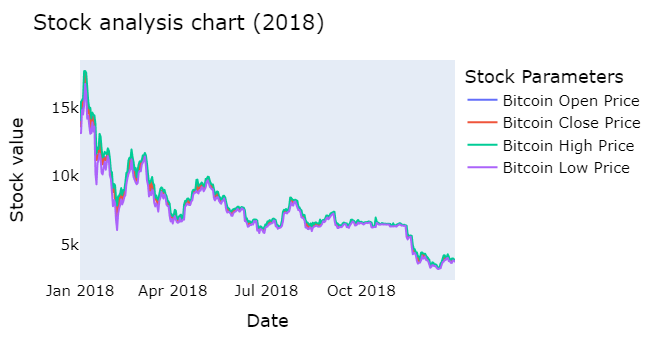

In [77]:
# Filter data for the year 2018
y_2018 = df.loc[(df['Date'] >= '2018-01-01') & (df['Date'] < '2019-01-01')]
y_2018 = y_2018.drop(columns=['Adj Close', 'Volume'])

# Convert the 'Date' column to numpy array to avoid future warnings
y_2018['Date'] = np.array(y_2018['Date'], dtype='datetime64')

# Group data by month and calculate mean for 'Open' and 'Close' prices
monthwise_2018 = y_2018.groupby(y_2018['Date'].astype(str).str[:7])[['Open', 'Close']].mean()
monthwise_2018.index = pd.to_datetime(monthwise_2018.index)
monthwise_2018.index = monthwise_2018.index.strftime('%B')
monthwise_2018 = monthwise_2018.reindex(new_order, axis=0)

# Create the figure for monthwise open and close prices
fig = go.Figure()

# Add trace for stock open prices
fig.add_trace(go.Bar(
    x=monthwise_2018.index,
    y=monthwise_2018['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))

# Add trace for stock close prices
fig.add_trace(go.Bar(
    x=monthwise_2018.index,
    y=monthwise_2018['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

# Update layout for better visualization
fig.update_layout(
    barmode='group',
    xaxis_tickangle=-45,
    title='Monthwise Comparison between Stock Open and Close Prices (2018)',
    xaxis_title='Month',
    yaxis_title='Price'
)

# Show the plot
fig.show()

# Group data by month and calculate max 'High' and min 'Low' prices
monthwise_high_2018 = y_2018.groupby(y_2018['Date'].astype(str).str[:7])['High'].max()
monthwise_low_2018 = y_2018.groupby(y_2018['Date'].astype(str).str[:7])['Low'].min()
monthwise_high_2018.index = pd.to_datetime(monthwise_high_2018.index)
monthwise_low_2018.index = pd.to_datetime(monthwise_low_2018.index)
monthwise_high_2018.index = monthwise_high_2018.index.strftime('%B')
monthwise_low_2018.index = monthwise_low_2018.index.strftime('%B')
monthwise_high_2018 = monthwise_high_2018.reindex(new_order)
monthwise_low_2018 = monthwise_low_2018.reindex(new_order)

# Create the figure for monthwise high and low prices
fig = go.Figure()

# Add trace for monthly high prices
fig.add_trace(go.Bar(
    x=monthwise_high_2018.index,
    y=monthwise_high_2018,
    name='Bitcoin High Price',
    marker_color='rgb(0, 153, 204)'
))

# Add trace for monthly low prices
fig.add_trace(go.Bar(
    x=monthwise_low_2018.index,
    y=monthwise_low_2018,
    name='Bitcoin Low Price',
    marker_color='rgb(255, 128, 0)'
))

# Update layout for better visualization
fig.update_layout(
    barmode='group',
    title='Monthwise High and Low Bitcoin Prices (2018)',
    xaxis_title='Month',
    yaxis_title='Price',
    xaxis_tickangle=-45
)

# Show the plot
fig.show()

# Create the names cycle
names = cycle(['Bitcoin Open Price', 'Bitcoin Close Price', 'Bitcoin High Price', 'Bitcoin Low Price'])

# Create the line plot for daily prices in 2018
fig = px.line(y_2018, x='Date', y=['Open', 'Close', 'High', 'Low'],
              labels={'Date': 'Date', 'value': 'Stock value'})

# Update layout for the line plot
fig.update_layout(
    title_text='Stock analysis chart (2018)',
    font_size=15,
    font_color='black',
    legend_title_text='Stock Parameters'
)

# Update the trace names
fig.for_each_trace(lambda t: t.update(name=next(names)))

# Update the axes to hide the grid
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show the plot
fig.show()


# 2019

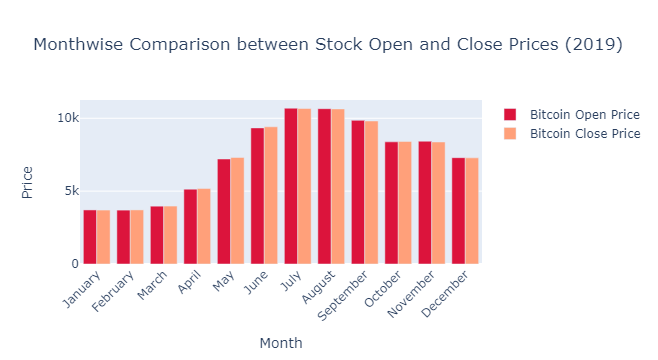

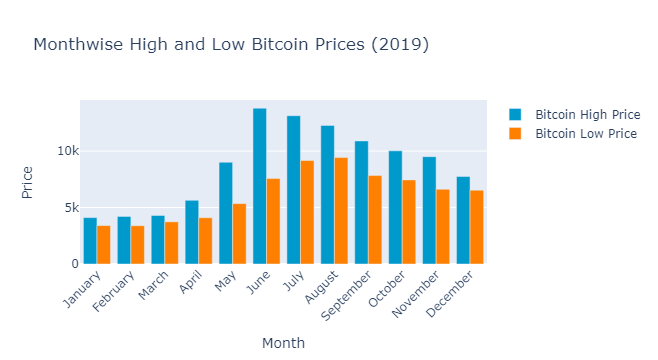

C:\Users\89339\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



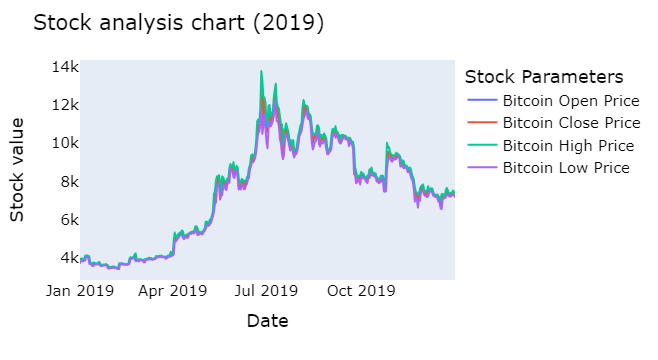

In [78]:
# Filter data for the year 2019
y_2019 = df.loc[(df['Date'] >= '2019-01-01') & (df['Date'] < '2020-01-01')]
y_2019 = y_2019.drop(columns=['Adj Close', 'Volume'])

# Convert the 'Date' column to numpy array to avoid future warnings
y_2019['Date'] = np.array(y_2019['Date'], dtype='datetime64')

# Group data by month and calculate mean for 'Open' and 'Close' prices
monthwise_2019 = y_2019.groupby(y_2019['Date'].astype(str).str[:7])[['Open', 'Close']].mean()
monthwise_2019.index = pd.to_datetime(monthwise_2019.index)
monthwise_2019.index = monthwise_2019.index.strftime('%B')
monthwise_2019 = monthwise_2019.reindex(new_order, axis=0)

# Create the figure for monthwise open and close prices
fig = go.Figure()

# Add trace for stock open prices
fig.add_trace(go.Bar(
    x=monthwise_2019.index,
    y=monthwise_2019['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))

# Add trace for stock close prices
fig.add_trace(go.Bar(
    x=monthwise_2019.index,
    y=monthwise_2019['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

# Update layout for better visualization
fig.update_layout(
    barmode='group',
    xaxis_tickangle=-45,
    title='Monthwise Comparison between Stock Open and Close Prices (2019)',
    xaxis_title='Month',
    yaxis_title='Price'
)

# Show the plot
fig.show()

# Group data by month and calculate max 'High' and min 'Low' prices
monthwise_high_2019 = y_2019.groupby(y_2019['Date'].astype(str).str[:7])['High'].max()
monthwise_low_2019 = y_2019.groupby(y_2019['Date'].astype(str).str[:7])['Low'].min()
monthwise_high_2019.index = pd.to_datetime(monthwise_high_2019.index)
monthwise_low_2019.index = pd.to_datetime(monthwise_low_2019.index)
monthwise_high_2019.index = monthwise_high_2019.index.strftime('%B')
monthwise_low_2019.index = monthwise_low_2019.index.strftime('%B')
monthwise_high_2019 = monthwise_high_2019.reindex(new_order)
monthwise_low_2019 = monthwise_low_2019.reindex(new_order)

# Create the figure for monthwise high and low prices
fig = go.Figure()

# Add trace for monthly high prices
fig.add_trace(go.Bar(
    x=monthwise_high_2019.index,
    y=monthwise_high_2019,
    name='Bitcoin High Price',
    marker_color='rgb(0, 153, 204)'
))

# Add trace for monthly low prices
fig.add_trace(go.Bar(
    x=monthwise_low_2019.index,
    y=monthwise_low_2019,
    name='Bitcoin Low Price',
    marker_color='rgb(255, 128, 0)'
))

# Update layout for better visualization
fig.update_layout(
    barmode='group',
    title='Monthwise High and Low Bitcoin Prices (2019)',
    xaxis_title='Month',
    yaxis_title='Price',
    xaxis_tickangle=-45
)

# Show the plot
fig.show()

# Create the names cycle
names = cycle(['Bitcoin Open Price', 'Bitcoin Close Price', 'Bitcoin High Price', 'Bitcoin Low Price'])

# Create the line plot for daily prices in 2019
fig = px.line(y_2019, x='Date', y=['Open', 'Close', 'High', 'Low'],
              labels={'Date': 'Date', 'value': 'Stock value'})

# Update layout for the line plot
fig.update_layout(
    title_text='Stock analysis chart (2019)',
    font_size=15,
    font_color='black',
    legend_title_text='Stock Parameters'
)

# Update the trace names
fig.for_each_trace(lambda t: t.update(name=next(names)))

# Update the axes to hide the grid
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show the plot
fig.show()


# 2020

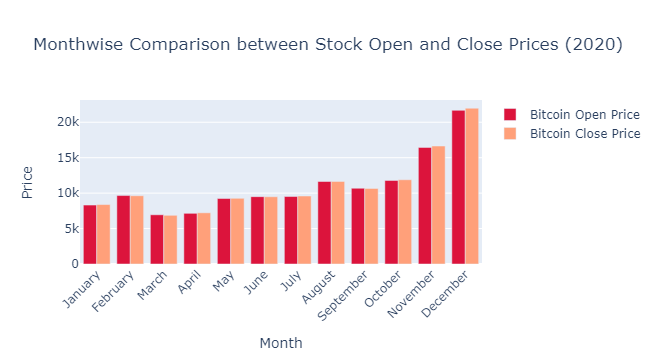

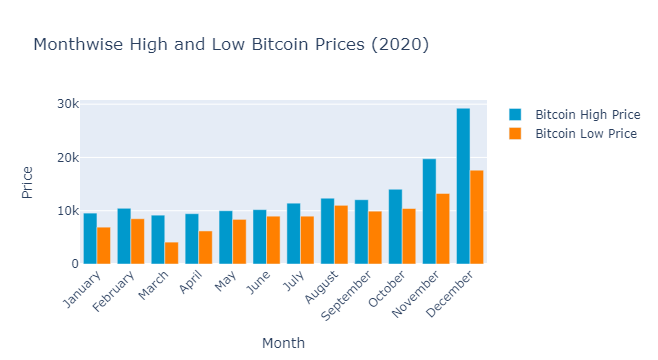

C:\Users\89339\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



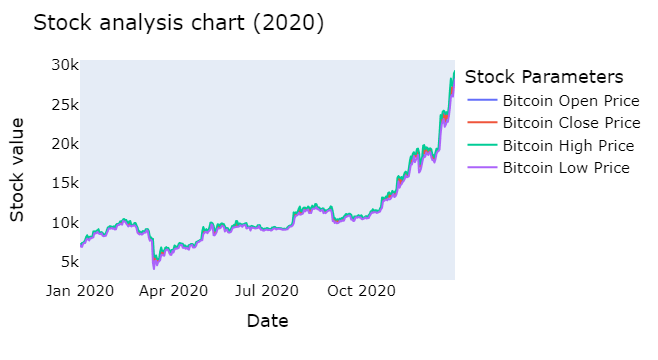

In [79]:
# Filter data for the year 2020
y_2020 = df.loc[(df['Date'] >= '2020-01-01') & (df['Date'] < '2021-01-01')]
y_2020 = y_2020.drop(columns=['Adj Close', 'Volume'])

# Convert the 'Date' column to numpy array to avoid future warnings
y_2020['Date'] = np.array(y_2020['Date'], dtype='datetime64')

# Group data by month and calculate mean for 'Open' and 'Close' prices
monthwise_2020 = y_2020.groupby(y_2020['Date'].astype(str).str[:7])[['Open', 'Close']].mean()
monthwise_2020.index = pd.to_datetime(monthwise_2020.index)
monthwise_2020.index = monthwise_2020.index.strftime('%B')
monthwise_2020 = monthwise_2020.reindex(new_order, axis=0)

# Create the figure for monthwise open and close prices
fig = go.Figure()

# Add trace for stock open prices
fig.add_trace(go.Bar(
    x=monthwise_2020.index,
    y=monthwise_2020['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))

# Add trace for stock close prices
fig.add_trace(go.Bar(
    x=monthwise_2020.index,
    y=monthwise_2020['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

# Update layout for better visualization
fig.update_layout(
    barmode='group',
    xaxis_tickangle=-45,
    title='Monthwise Comparison between Stock Open and Close Prices (2020)',
    xaxis_title='Month',
    yaxis_title='Price'
)

# Show the plot
fig.show()

# Group data by month and calculate max 'High' and min 'Low' prices
monthwise_high_2020 = y_2020.groupby(y_2020['Date'].astype(str).str[:7])['High'].max()
monthwise_low_2020 = y_2020.groupby(y_2020['Date'].astype(str).str[:7])['Low'].min()
monthwise_high_2020.index = pd.to_datetime(monthwise_high_2020.index)
monthwise_low_2020.index = pd.to_datetime(monthwise_low_2020.index)
monthwise_high_2020.index = monthwise_high_2020.index.strftime('%B')
monthwise_low_2020.index = monthwise_low_2020.index.strftime('%B')
monthwise_high_2020 = monthwise_high_2020.reindex(new_order)
monthwise_low_2020 = monthwise_low_2020.reindex(new_order)

# Create the figure for monthwise high and low prices
fig = go.Figure()

# Add trace for monthly high prices
fig.add_trace(go.Bar(
    x=monthwise_high_2020.index,
    y=monthwise_high_2020,
    name='Bitcoin High Price',
    marker_color='rgb(0, 153, 204)'
))

# Add trace for monthly low prices
fig.add_trace(go.Bar(
    x=monthwise_low_2020.index,
    y=monthwise_low_2020,
    name='Bitcoin Low Price',
    marker_color='rgb(255, 128, 0)'
))

# Update layout for better visualization
fig.update_layout(
    barmode='group',
    title='Monthwise High and Low Bitcoin Prices (2020)',
    xaxis_title='Month',
    yaxis_title='Price',
    xaxis_tickangle=-45
)

# Show the plot
fig.show()

# Create the names cycle
names = cycle(['Bitcoin Open Price', 'Bitcoin Close Price', 'Bitcoin High Price', 'Bitcoin Low Price'])

# Create the line plot for daily prices in 2020
fig = px.line(y_2020, x='Date', y=['Open', 'Close', 'High', 'Low'],
              labels={'Date': 'Date', 'value': 'Stock value'})

# Update layout for the line plot
fig.update_layout(
    title_text='Stock analysis chart (2020)',
    font_size=15,
    font_color='black',
    legend_title_text='Stock Parameters'
)

# Update the trace names
fig.for_each_trace(lambda t: t.update(name=next(names)))

# Update the axes to hide the grid
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show the plot
fig.show()


# 2021

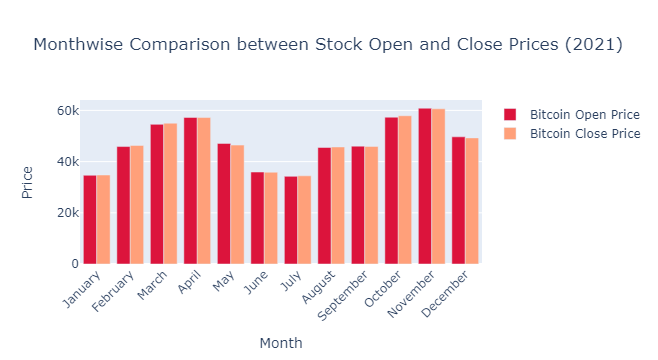

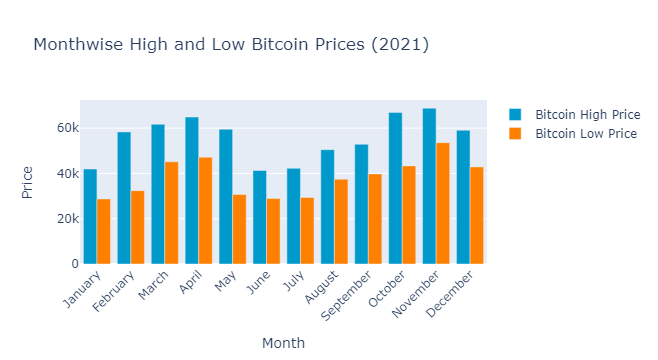

C:\Users\89339\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



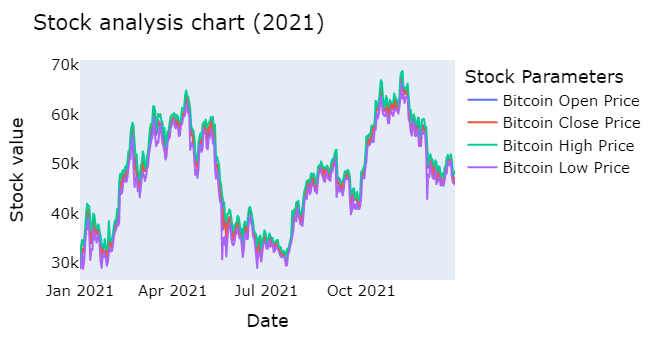

In [80]:
# Filter data for the year 2021
y_2021 = df.loc[(df['Date'] >= '2021-01-01') & (df['Date'] < '2022-01-01')]
y_2021 = y_2021.drop(columns=['Adj Close', 'Volume'])

# Convert the 'Date' column to numpy array to avoid future warnings
y_2021['Date'] = np.array(y_2021['Date'], dtype='datetime64')

# Group data by month and calculate mean for 'Open' and 'Close' prices
monthwise_2021 = y_2021.groupby(y_2021['Date'].astype(str).str[:7])[['Open', 'Close']].mean()
monthwise_2021.index = pd.to_datetime(monthwise_2021.index)
monthwise_2021.index = monthwise_2021.index.strftime('%B')
monthwise_2021 = monthwise_2021.reindex(new_order, axis=0)

# Create the figure for monthwise open and close prices
fig = go.Figure()

# Add trace for stock open prices
fig.add_trace(go.Bar(
    x=monthwise_2021.index,
    y=monthwise_2021['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))

# Add trace for stock close prices
fig.add_trace(go.Bar(
    x=monthwise_2021.index,
    y=monthwise_2021['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

# Update layout for better visualization
fig.update_layout(
    barmode='group',
    xaxis_tickangle=-45,
    title='Monthwise Comparison between Stock Open and Close Prices (2021)',
    xaxis_title='Month',
    yaxis_title='Price'
)

# Show the plot
fig.show()

# Group data by month and calculate max 'High' and min 'Low' prices
monthwise_high_2021 = y_2021.groupby(y_2021['Date'].astype(str).str[:7])['High'].max()
monthwise_low_2021 = y_2021.groupby(y_2021['Date'].astype(str).str[:7])['Low'].min()
monthwise_high_2021.index = pd.to_datetime(monthwise_high_2021.index)
monthwise_low_2021.index = pd.to_datetime(monthwise_low_2021.index)
monthwise_high_2021.index = monthwise_high_2021.index.strftime('%B')
monthwise_low_2021.index = monthwise_low_2021.index.strftime('%B')
monthwise_high_2021 = monthwise_high_2021.reindex(new_order)
monthwise_low_2021 = monthwise_low_2021.reindex(new_order)

# Create the figure for monthwise high and low prices
fig = go.Figure()

# Add trace for monthly high prices
fig.add_trace(go.Bar(
    x=monthwise_high_2021.index,
    y=monthwise_high_2021,
    name='Bitcoin High Price',
    marker_color='rgb(0, 153, 204)'
))

# Add trace for monthly low prices
fig.add_trace(go.Bar(
    x=monthwise_low_2021.index,
    y=monthwise_low_2021,
    name='Bitcoin Low Price',
    marker_color='rgb(255, 128, 0)'
))

# Update layout for better visualization
fig.update_layout(
    barmode='group',
    title='Monthwise High and Low Bitcoin Prices (2021)',
    xaxis_title='Month',
    yaxis_title='Price',
    xaxis_tickangle=-45
)

# Show the plot
fig.show()

# Create the names cycle
names = cycle(['Bitcoin Open Price', 'Bitcoin Close Price', 'Bitcoin High Price', 'Bitcoin Low Price'])

# Create the line plot for daily prices in 2021
fig = px.line(y_2021, x='Date', y=['Open', 'Close', 'High', 'Low'],
              labels={'Date': 'Date', 'value': 'Stock value'})

# Update layout for the line plot
fig.update_layout(
    title_text='Stock analysis chart (2021)',
    font_size=15,
    font_color='black',
    legend_title_text='Stock Parameters'
)

# Update the trace names
fig.for_each_trace(lambda t: t.update(name=next(names)))

# Update the axes to hide the grid
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show the plot
fig.show()


# 2022

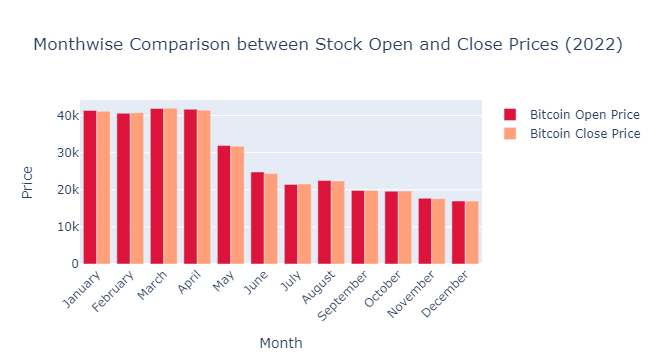

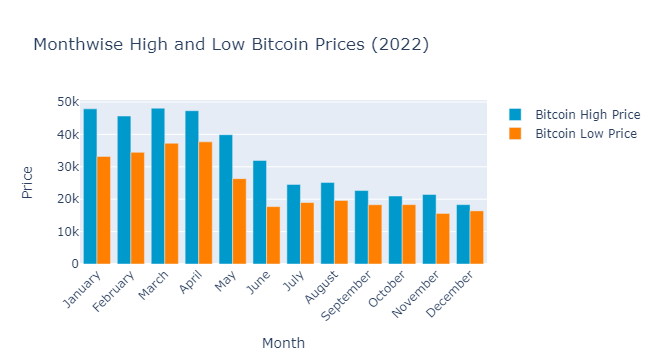

C:\Users\89339\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



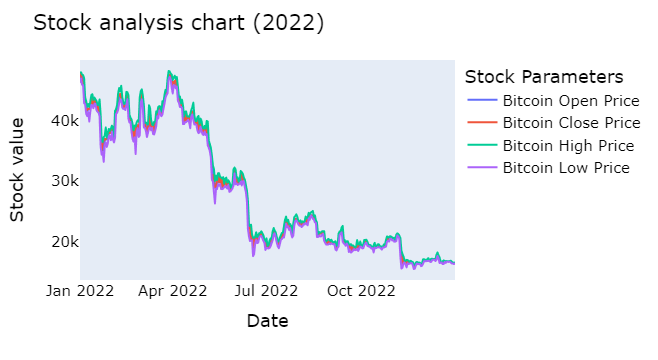

In [81]:
# Filter data for the year 2022
y_2022 = df.loc[(df['Date'] >= '2022-01-01') & (df['Date'] < '2023-01-01')]
y_2022 = y_2022.drop(columns=['Adj Close', 'Volume'])

# Convert the 'Date' column to numpy array to avoid future warnings
y_2022['Date'] = np.array(y_2022['Date'], dtype='datetime64')

# Group data by month and calculate mean for 'Open' and 'Close' prices
monthwise_2022 = y_2022.groupby(y_2022['Date'].astype(str).str[:7])[['Open', 'Close']].mean()
monthwise_2022.index = pd.to_datetime(monthwise_2022.index)
monthwise_2022.index = monthwise_2022.index.strftime('%B')
monthwise_2022 = monthwise_2022.reindex(new_order, axis=0)

# Create the figure for monthwise open and close prices
fig = go.Figure()

# Add trace for stock open prices
fig.add_trace(go.Bar(
    x=monthwise_2022.index,
    y=monthwise_2022['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))

# Add trace for stock close prices
fig.add_trace(go.Bar(
    x=monthwise_2022.index,
    y=monthwise_2022['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

# Update layout for better visualization
fig.update_layout(
    barmode='group',
    xaxis_tickangle=-45,
    title='Monthwise Comparison between Stock Open and Close Prices (2022)',
    xaxis_title='Month',
    yaxis_title='Price'
)

# Show the plot
fig.show()

# Group data by month and calculate max 'High' and min 'Low' prices
monthwise_high_2022 = y_2022.groupby(y_2022['Date'].astype(str).str[:7])['High'].max()
monthwise_low_2022 = y_2022.groupby(y_2022['Date'].astype(str).str[:7])['Low'].min()
monthwise_high_2022.index = pd.to_datetime(monthwise_high_2022.index)
monthwise_low_2022.index = pd.to_datetime(monthwise_low_2022.index)
monthwise_high_2022.index = monthwise_high_2022.index.strftime('%B')
monthwise_low_2022.index = monthwise_low_2022.index.strftime('%B')
monthwise_high_2022 = monthwise_high_2022.reindex(new_order)
monthwise_low_2022 = monthwise_low_2022.reindex(new_order)

# Create the figure for monthwise high and low prices
fig = go.Figure()

# Add trace for monthly high prices
fig.add_trace(go.Bar(
    x=monthwise_high_2022.index,
    y=monthwise_high_2022,
    name='Bitcoin High Price',
    marker_color='rgb(0, 153, 204)'
))

# Add trace for monthly low prices
fig.add_trace(go.Bar(
    x=monthwise_low_2022.index,
    y=monthwise_low_2022,
    name='Bitcoin Low Price',
    marker_color='rgb(255, 128, 0)'
))

# Update layout for better visualization
fig.update_layout(
    barmode='group',
    title='Monthwise High and Low Bitcoin Prices (2022)',
    xaxis_title='Month',
    yaxis_title='Price',
    xaxis_tickangle=-45
)

# Show the plot
fig.show()

# Create the names cycle
names = cycle(['Bitcoin Open Price', 'Bitcoin Close Price', 'Bitcoin High Price', 'Bitcoin Low Price'])

# Create the line plot for daily prices in 2022
fig = px.line(y_2022, x='Date', y=['Open', 'Close', 'High', 'Low'],
              labels={'Date': 'Date', 'value': 'Stock value'})

# Update layout for the line plot
fig.update_layout(
    title_text='Stock analysis chart (2022)',
    font_size=15,
    font_color='black',
    legend_title_text='Stock Parameters'
)

# Update the trace names
fig.for_each_trace(lambda t: t.update(name=next(names)))

# Update the axes to hide the grid
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show the plot
fig.show()


# 2023

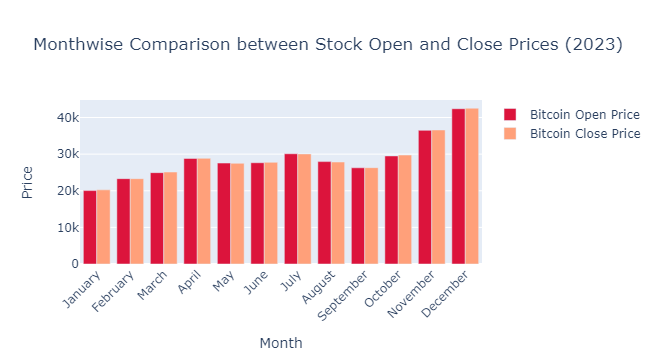

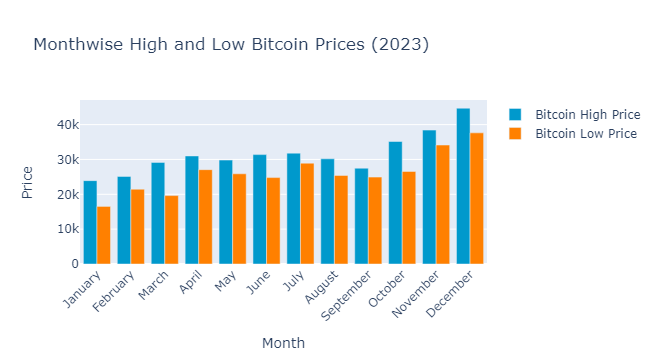

C:\Users\89339\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



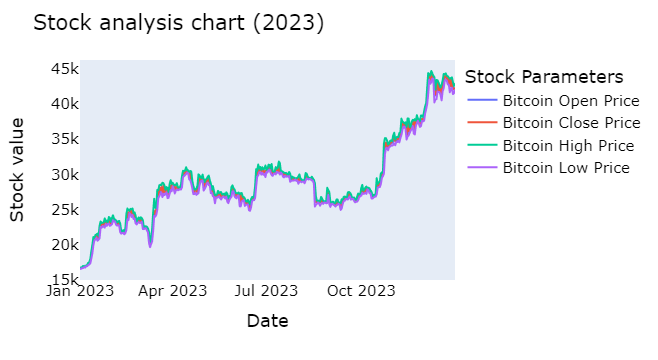

In [83]:
# Filter data for the year 2023
y_2023 = df.loc[(df['Date'] >= '2023-01-01') & (df['Date'] < '2024-01-01')]
y_2023 = y_2023.drop(columns=['Adj Close', 'Volume'])

# Convert the 'Date' column to numpy array to avoid future warnings
y_2023['Date'] = np.array(y_2023['Date'], dtype='datetime64')

# Group data by month and calculate mean for 'Open' and 'Close' prices
monthwise_2023 = y_2023.groupby(y_2023['Date'].astype(str).str[:7])[['Open', 'Close']].mean()
monthwise_2023.index = pd.to_datetime(monthwise_2023.index)
monthwise_2023.index = monthwise_2023.index.strftime('%B')
monthwise_2023 = monthwise_2023.reindex(new_order, axis=0)

# Create the figure for monthwise open and close prices
fig = go.Figure()

# Add trace for stock open prices
fig.add_trace(go.Bar(
    x=monthwise_2023.index,
    y=monthwise_2023['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))

# Add trace for stock close prices
fig.add_trace(go.Bar(
    x=monthwise_2023.index,
    y=monthwise_2023['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

# Update layout for better visualization
fig.update_layout(
    barmode='group',
    xaxis_tickangle=-45,
    title='Monthwise Comparison between Stock Open and Close Prices (2023)',
    xaxis_title='Month',
    yaxis_title='Price'
)

# Show the plot
fig.show()

# Group data by month and calculate max 'High' and min 'Low' prices
monthwise_high_2023 = y_2023.groupby(y_2023['Date'].astype(str).str[:7])['High'].max()
monthwise_low_2023 = y_2023.groupby(y_2023['Date'].astype(str).str[:7])['Low'].min()
monthwise_high_2023.index = pd.to_datetime(monthwise_high_2023.index)
monthwise_low_2023.index = pd.to_datetime(monthwise_low_2023.index)
monthwise_high_2023.index = monthwise_high_2023.index.strftime('%B')
monthwise_low_2023.index = monthwise_low_2023.index.strftime('%B')
monthwise_high_2023 = monthwise_high_2023.reindex(new_order)
monthwise_low_2023 = monthwise_low_2023.reindex(new_order)

# Create the figure for monthwise high and low prices
fig = go.Figure()

# Add trace for monthly high prices
fig.add_trace(go.Bar(
    x=monthwise_high_2023.index,
    y=monthwise_high_2023,
    name='Bitcoin High Price',
    marker_color='rgb(0, 153, 204)'
))

# Add trace for monthly low prices
fig.add_trace(go.Bar(
    x=monthwise_low_2023.index,
    y=monthwise_low_2023,
    name='Bitcoin Low Price',
    marker_color='rgb(255, 128, 0)'
))

# Update layout for better visualization
fig.update_layout(
    barmode='group',
    title='Monthwise High and Low Bitcoin Prices (2023)',
    xaxis_title='Month',
    yaxis_title='Price',
    xaxis_tickangle=-45
)

# Show the plot
fig.show()

# Create the names cycle
names = cycle(['Bitcoin Open Price', 'Bitcoin Close Price', 'Bitcoin High Price', 'Bitcoin Low Price'])

# Create the line plot for daily prices in 2023
fig = px.line(y_2023, x='Date', y=['Open', 'Close', 'High', 'Low'],
              labels={'Date': 'Date', 'value': 'Stock value'})

# Update layout for the line plot
fig.update_layout(
    title_text='Stock analysis chart (2023)',
    font_size=15,
    font_color='black',
    legend_title_text='Stock Parameters'
)

# Update the trace names
fig.for_each_trace(lambda t: t.update(name=next(names)))

# Update the axes to hide the grid
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show the plot
fig.show()


# This is year of 2024 so all datas are not available

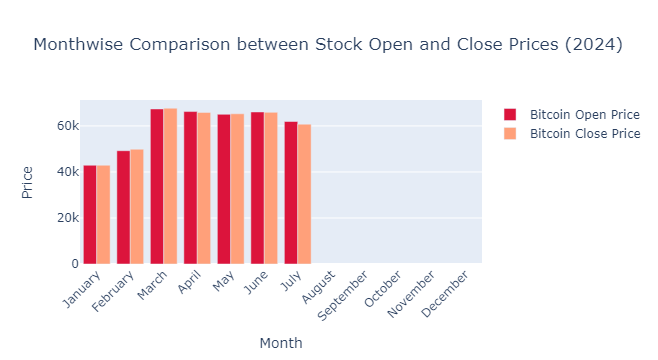

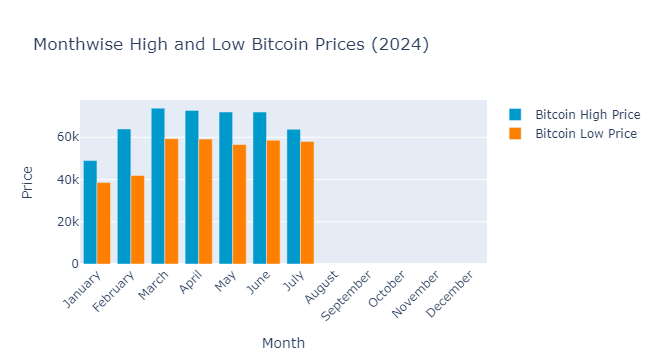

C:\Users\89339\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



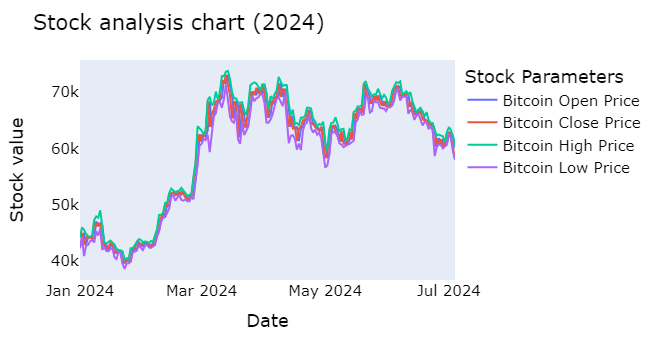

In [84]:
# Filter data for the year 2024
y_2024 = df.loc[(df['Date'] >= '2024-01-01') & (df['Date'] < '2025-01-01')]
y_2024 = y_2024.drop(columns=['Adj Close', 'Volume'])

# Convert the 'Date' column to numpy array to avoid future warnings
y_2024['Date'] = np.array(y_2024['Date'], dtype='datetime64')

# Group data by month and calculate mean for 'Open' and 'Close' prices
monthwise_2024 = y_2024.groupby(y_2024['Date'].astype(str).str[:7])[['Open', 'Close']].mean()
monthwise_2024.index = pd.to_datetime(monthwise_2024.index)
monthwise_2024.index = monthwise_2024.index.strftime('%B')
monthwise_2024 = monthwise_2024.reindex(new_order, axis=0)

# Create the figure for monthwise open and close prices
fig = go.Figure()

# Add trace for stock open prices
fig.add_trace(go.Bar(
    x=monthwise_2024.index,
    y=monthwise_2024['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))

# Add trace for stock close prices
fig.add_trace(go.Bar(
    x=monthwise_2024.index,
    y=monthwise_2024['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

# Update layout for better visualization
fig.update_layout(
    barmode='group',
    xaxis_tickangle=-45,
    title='Monthwise Comparison between Stock Open and Close Prices (2024)',
    xaxis_title='Month',
    yaxis_title='Price'
)

# Show the plot
fig.show()

# Group data by month and calculate max 'High' and min 'Low' prices
monthwise_high_2024 = y_2024.groupby(y_2024['Date'].astype(str).str[:7])['High'].max()
monthwise_low_2024 = y_2024.groupby(y_2024['Date'].astype(str).str[:7])['Low'].min()
monthwise_high_2024.index = pd.to_datetime(monthwise_high_2024.index)
monthwise_low_2024.index = pd.to_datetime(monthwise_low_2024.index)
monthwise_high_2024.index = monthwise_high_2024.index.strftime('%B')
monthwise_low_2024.index = monthwise_low_2024.index.strftime('%B')
monthwise_high_2024 = monthwise_high_2024.reindex(new_order)
monthwise_low_2024 = monthwise_low_2024.reindex(new_order)

# Create the figure for monthwise high and low prices
fig = go.Figure()

# Add trace for monthly high prices
fig.add_trace(go.Bar(
    x=monthwise_high_2024.index,
    y=monthwise_high_2024,
    name='Bitcoin High Price',
    marker_color='rgb(0, 153, 204)'
))

# Add trace for monthly low prices
fig.add_trace(go.Bar(
    x=monthwise_low_2024.index,
    y=monthwise_low_2024,
    name='Bitcoin Low Price',
    marker_color='rgb(255, 128, 0)'
))

# Update layout for better visualization
fig.update_layout(
    barmode='group',
    title='Monthwise High and Low Bitcoin Prices (2024)',
    xaxis_title='Month',
    yaxis_title='Price',
    xaxis_tickangle=-45
)

# Show the plot
fig.show()

# Create the names cycle
names = cycle(['Bitcoin Open Price', 'Bitcoin Close Price', 'Bitcoin High Price', 'Bitcoin Low Price'])

# Create the line plot for daily prices in 2024
fig = px.line(y_2024, x='Date', y=['Open', 'Close', 'High', 'Low'],
              labels={'Date': 'Date', 'value': 'Stock value'})

# Update layout for the line plot
fig.update_layout(
    title_text='Stock analysis chart (2024)',
    font_size=15,
    font_color='black',
    legend_title_text='Stock Parameters'
)

# Update the trace names
fig.for_each_trace(lambda t: t.update(name=next(names)))

# Update the axes to hide the grid
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show the plot
fig.show()


# Overall 2014-2025

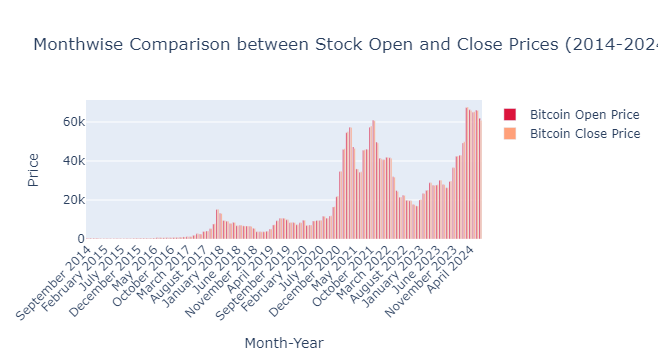

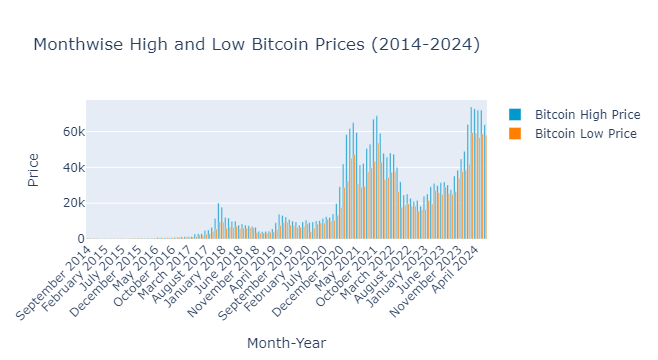

C:\Users\89339\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



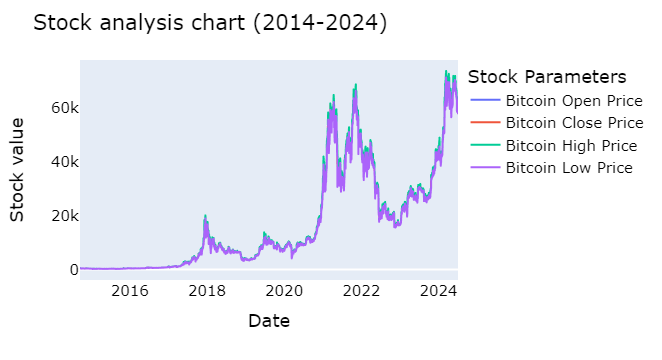

In [85]:
# Filter data for the years 2014 to 2024
overall = df.loc[(df['Date'] >= '2014-01-01') & (df['Date'] < '2025-01-01')]
overall = overall.drop(columns=['Adj Close', 'Volume'])

# Convert the 'Date' column to numpy array to avoid future warnings
overall['Date'] = np.array(overall['Date'], dtype='datetime64')

# Group data by month and calculate mean for 'Open' and 'Close' prices
monthwise_overall = overall.groupby(overall['Date'].astype(str).str[:7])[['Open', 'Close']].mean()
monthwise_overall.index = pd.to_datetime(monthwise_overall.index)
monthwise_overall.index = monthwise_overall.index.strftime('%B %Y')

# Create the figure for monthwise open and close prices
fig = go.Figure()

# Add trace for stock open prices
fig.add_trace(go.Bar(
    x=monthwise_overall.index,
    y=monthwise_overall['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))

# Add trace for stock close prices
fig.add_trace(go.Bar(
    x=monthwise_overall.index,
    y=monthwise_overall['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

# Update layout for better visualization
fig.update_layout(
    barmode='group',
    xaxis_tickangle=-45,
    title='Monthwise Comparison between Stock Open and Close Prices (2014-2024)',
    xaxis_title='Month-Year',
    yaxis_title='Price'
)

# Show the plot
fig.show()

# Group data by month and calculate max 'High' and min 'Low' prices
monthwise_high_overall = overall.groupby(overall['Date'].astype(str).str[:7])['High'].max()
monthwise_low_overall = overall.groupby(overall['Date'].astype(str).str[:7])['Low'].min()
monthwise_high_overall.index = pd.to_datetime(monthwise_high_overall.index)
monthwise_low_overall.index = pd.to_datetime(monthwise_low_overall.index)
monthwise_high_overall.index = monthwise_high_overall.index.strftime('%B %Y')
monthwise_low_overall.index = monthwise_low_overall.index.strftime('%B %Y')

# Create the figure for monthwise high and low prices
fig = go.Figure()

# Add trace for monthly high prices
fig.add_trace(go.Bar(
    x=monthwise_high_overall.index,
    y=monthwise_high_overall,
    name='Bitcoin High Price',
    marker_color='rgb(0, 153, 204)'
))

# Add trace for monthly low prices
fig.add_trace(go.Bar(
    x=monthwise_low_overall.index,
    y=monthwise_low_overall,
    name='Bitcoin Low Price',
    marker_color='rgb(255, 128, 0)'
))

# Update layout for better visualization
fig.update_layout(
    barmode='group',
    title='Monthwise High and Low Bitcoin Prices (2014-2024)',
    xaxis_title='Month-Year',
    yaxis_title='Price',
    xaxis_tickangle=-45
)

# Show the plot
fig.show()

# Create the names cycle
names = cycle(['Bitcoin Open Price', 'Bitcoin Close Price', 'Bitcoin High Price', 'Bitcoin Low Price'])

# Create the line plot for daily prices from 2014 to 2024
fig = px.line(overall, x='Date', y=['Open', 'Close', 'High', 'Low'],
              labels={'Date': 'Date', 'value': 'Stock value'})

# Update layout for the line plot
fig.update_layout(
    title_text='Stock analysis chart (2014-2024)',
    font_size=15,
    font_color='black',
    legend_title_text='Stock Parameters'
)

# Update the trace names
fig.for_each_trace(lambda t: t.update(name=next(names)))

# Update the axes to hide the grid
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show the plot
fig.show()


# LSTM model

In [87]:
closedf=df[['Date','Close']]
print("Shape of close dataframe",closedf.shape)

Shape of close dataframe (3579, 2)


C:\Users\89339\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



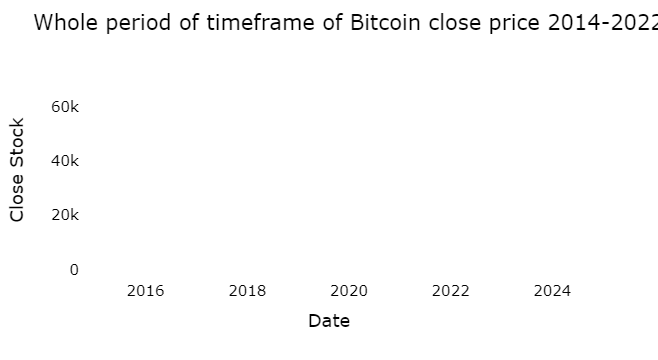

In [89]:
fig = px.line(closedf, x='Date', y='Close', labels={'Date': 'Date', 'Close': 'Close Stock'})

# Update the plot's traces for better visualization
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color="orange")

# Update the layout of the plot
fig.update_layout(
    title_text='Whole period of timeframe of Bitcoin close price 2014-2022',
    plot_bgcolor="white",
    font_size=15,
    font_color='black'
)

# Remove gridlines from the plot
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show the plot
fig.show()

# Last 1 year data

In [93]:
closedf=closedf[closedf['Date']>'2023-07-04']
close_stock=closedf.copy()
print("Total data for prediction:",closedf.shape[0])

Total data for prediction: 366


In [94]:
closedf

Date         Close
3213 2023-07-05  30514.166016
3214 2023-07-06  29909.337891
3215 2023-07-07  30342.265625
3216 2023-07-08  30292.541016
3217 2023-07-09  30171.234375
...         ...           ...
3574 2024-06-30  62678.292969
3575 2024-07-01  62851.980469
3576 2024-07-02  62029.015625
3577 2024-07-03  60173.921875
3578 2024-07-04  57998.082031

[366 rows x 2 columns]

C:\Users\89339\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



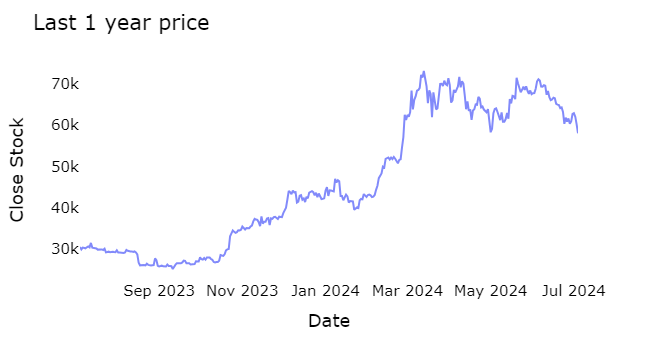

In [96]:
fig = px.line(closedf, x='Date', y='Close', labels={'Date': 'Date', 'Close': 'Close Stock'})

# Update the plot's traces for better visualization
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color="orange")

# Update the layout of the plot
fig.update_layout(
    title_text='Last 1 year price',
    plot_bgcolor="white",
    font_size=15,
    font_color='black'
)

# Remove gridlines from the plot
fig.update_xaxes(showgrid=False)  # Hides the vertical gridlines
fig.update_yaxes(showgrid=False)  # Hides the horizontal gridlines

# Show the plot
fig.show()

In [98]:
# Normalizing : string to int so tat proper prediction
closedf.drop('Date', axis=1, inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
closedf = scaler.fit_transform(np.array(closedf).reshape(-1, 1))

print(closedf.shape)


(366, 1)


In [100]:
# Assuming closedf is a numpy array after normalization

training_size = int(len(closedf) * 0.60)
test_size = len(closedf) - training_size

train_data, test_data = closedf[0:training_size, :], closedf[training_size:len(closedf), :]

print("train_data:", train_data.shape)
print("test_data:", test_data.shape)


train_data: (219, 1)
test_data: (147, 1)


In [101]:
def create_dataset(dataset, time_step=1):
    datax, datay = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        datax.append(a)
        datay.append(dataset[i + time_step, 0])
    return np.array(datax), np.array(datay)

time_step = 15

x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

print("X_train:", x_train.shape)
print("y_train:", y_train.shape)
print("X_test:", x_test.shape)
print("y_test:", y_test.shape)

X_train: (203, 15)
y_train: (203,)
X_test: (131, 15)
y_test: (131,)


In [102]:
X_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
X_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

print("X_train reshaped:", X_train.shape)
print("X_test reshaped:", X_test.shape)


X_train reshaped: (203, 15, 1)
X_test reshaped: (131, 15, 1)


# Actual model building

In [103]:
model = Sequential()

# Add LSTM layer
model.add(LSTM(10, input_shape=(None, 1), activation="relu"))

# Add Dense layer
model.add(Dense(1))

# Compile the model
model.compile(loss="mean_squared_error", optimizer="adam")

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=32, verbose=1)

C:\Users\89339\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - loss: 0.0608 - val_loss: 0.6489
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0462 - val_loss: 0.5582
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0369 - val_loss: 0.4748
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0319 - val_loss: 0.3977
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0244 - val_loss: 0.3278
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0204 - val_loss: 0.2596
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0158 - val_loss: 0.1959
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0107 - val_loss: 0.1397
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0091 - val_loss: 0.0886
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0065 - val_loss: 0.0500
Epoch 11/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0050 - val_loss: 0.0240
Epoch 12/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0038 - val_l

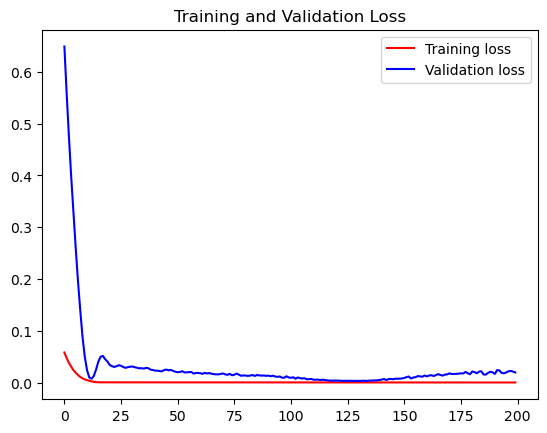

In [104]:
loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a range object for the number of epochs
epochs = range(len(loss))

# Plot the training and validation loss
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

# Add a title and legend to the plot
plt.title("Training and Validation Loss")
plt.legend(loc=0)

# Display the plot
plt.show()

In [106]:
# Make predictions on the training and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Check the shapes of the predictions
train_predict.shape, test_predict.shape


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


((203, 1), (131, 1))

In [107]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Inverse transform the original y values
original_ytrain = scaler.inverse_transform(y_train.reshape(-1, 1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluation metrics RMSE, MSE, and MAE for training data
train_rmse = math.sqrt(mean_squared_error(original_ytrain, train_predict))
train_mse = mean_squared_error(original_ytrain, train_predict)
train_mae = mean_absolute_error(original_ytrain, train_predict)

# Evaluation metrics RMSE, MSE, and MAE for test data
test_rmse = math.sqrt(mean_squared_error(original_ytest, test_predict))
test_mse = mean_squared_error(original_ytest, test_predict)
test_mae = mean_absolute_error(original_ytest, test_predict)

# Print the results
print(f"Train data RMSE: {train_rmse}")
print(f"Train data MSE: {train_mse}")
print(f"Train data MAE: {train_mae}")
print()
print(f"Test data RMSE: {test_rmse}")
print(f"Test data MSE: {test_mse}")
print(f"Test data MAE: {test_mae}")

Train data RMSE: 948.3293394567617
Train data MSE: 899328.536074498
Train data MAE: 685.6581838651476

Test data RMSE: 6736.437501265583
Test data MSE: 45379590.20845729
Test data MAE: 6362.773050047711


# Variance Regression Score

In [108]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

# Print the R² scores for regression
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9813936830098469
Test data explained variance regression score: 0.6863587976745509
Train data R2 score: 0.9813503414208766
Test data R2 score: -1.9078150095486373


# Regression Loss mean gamma deviance regression loss (MGD)

In [109]:
print("Train data MGD:", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD:", mean_gamma_deviance(original_ytest, test_predict))

# Print the Mean Poisson Deviance
print("Train data MPD:", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD:", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD: 0.0007507046129702189
Test data MGD: 0.011944996326794648
Train data MPD: 25.521501444750864
Test data MPD: 734.98326281923


Train predicted data shape:  (366, 1)
Test predicted data shape:  (366, 1)


C:\Users\89339\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



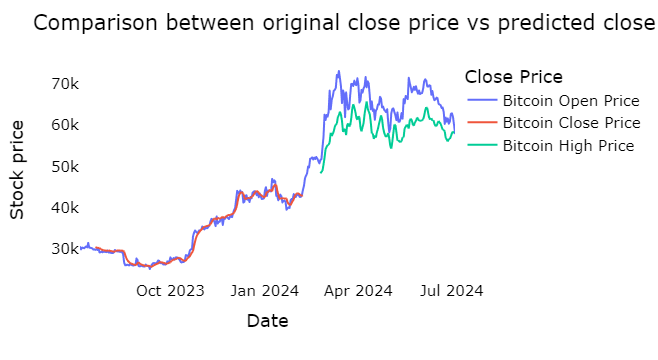

In [110]:
# Define look_back
look_back = time_step

# Prepare the data for plotting
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

# Check the shape of the train predicted data
print("Train predicted data shape: ", trainPredictPlot.shape)

# Shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1: len(closedf) - 1, :] = test_predict

# Check the shape of the test predicted data
print("Test predicted data shape: ", testPredictPlot.shape)

# Create a DataFrame for plotting
plotdf = pd.DataFrame({
    'date': close_stock['Date'],
    'original_close': close_stock['Close'],
    'train_predicted_close': trainPredictPlot.reshape(1, -1)[0].tolist(),
    'test_predicted_close': testPredictPlot.reshape(1, -1)[0].tolist()
})

# Plot the data using Plotly
fig = px.line(plotdf, x='date', y=['original_close', 'train_predicted_close', 'test_predicted_close'],
              labels={'value': 'Stock price', 'date': 'Date'})

fig.update_layout(
    title_text="Comparison between original close price vs predicted close price",
    plot_bgcolor='white',
    font=dict(size=15, color='black'),
    legend_title_text='Close Price'
)
fig.for_each_trace(lambda t: t.update(name=next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show the plot
fig.show()


# Predicting 30days

In [111]:
x_input = test_data[len(test_data) - time_step:].reshape(1, -1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

# Predict the next 30 days
lst_output = []
n_steps = time_step
i = 0
pred_days = 30

while i < pred_days:
    if len(temp_input) > time_step:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        # Predict next value
        yhat = model.predict(x_input, verbose=0)
        
        # Append the prediction to the list
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        
        # Predict next value
        yhat = model.predict(x_input, verbose=0)
        
        # Append the prediction to the list
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

# Print the predicted values
print("Predicted next 30 days:",len( lst_output))

Predicted next 30 days: 30


Last days range: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Prediction days range: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


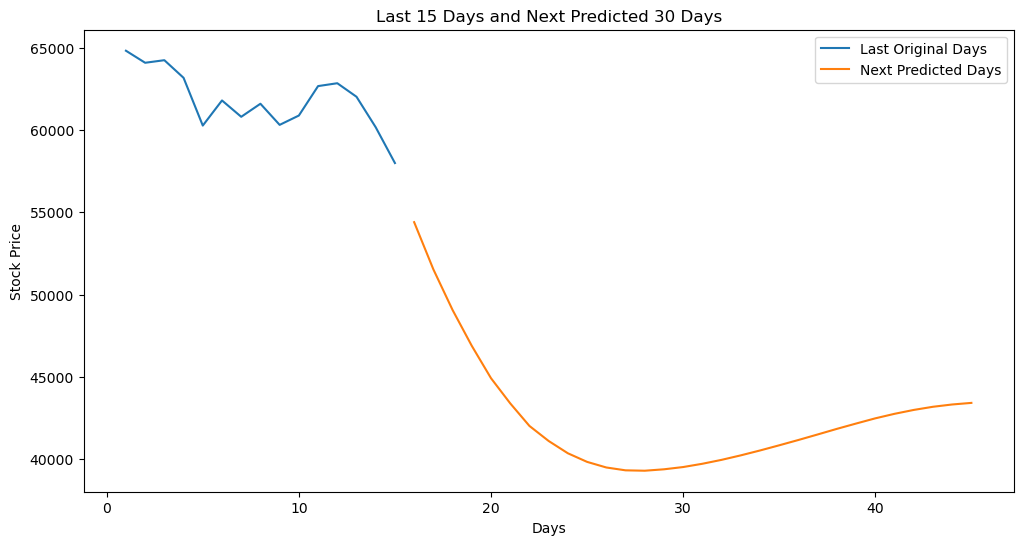

In [113]:
last_days = np.arange(1, time_step + 1)
day_pred = np.arange(time_step + 1, time_step + pred_days + 1)

# Print the ranges
print("Last days range:", last_days)
print("Prediction days range:", day_pred)

# Create a temporary array for plotting
temp_mat = np.empty((len(last_days) + pred_days, 1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1, -1).tolist()[0]

# Prepare the data for plotting
last_original_days_value = np.array(temp_mat[:time_step])
next_predicted_days_value = np.array(temp_mat[time_step:])

# Inverse transform the last days and predicted days values
last_original_days_value[:time_step] = scaler.inverse_transform(closedf[len(closedf) - time_step:].reshape(1, -1)).tolist()[0]
next_predicted_days_value[:pred_days] = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1)).reshape(1, -1).tolist()[0]

# Combine last original and predicted values for the plot
combined_values = np.concatenate((last_original_days_value, next_predicted_days_value))

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Days': np.arange(1, len(combined_values) + 1),
    'Stock Price': combined_values
})

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(plot_df['Days'][:time_step], plot_df['Stock Price'][:time_step], label='Last Original Days')
plt.plot(plot_df['Days'][time_step:], plot_df['Stock Price'][time_step:], label='Next Predicted Days')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Last 15 Days and Next Predicted 30 Days')
plt.legend()
plt.show()

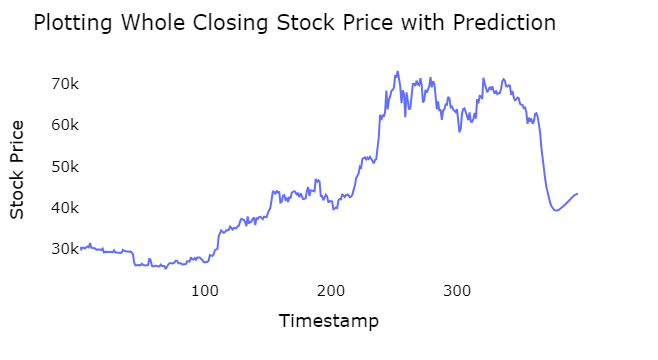

In [114]:
combined_data = closedf.tolist()
combined_data.extend(np.array(lst_output).reshape(-1, 1).tolist())

# Inverse transform to get back the original scale
combined_data = scaler.inverse_transform(combined_data).reshape(1, -1).tolist()[0]

# Prepare a DataFrame for plotting
plot_df = pd.DataFrame({
    'Timestamp': np.arange(1, len(combined_data) + 1),
    'Stock Price': combined_data
})

# Plot the data using Plotly Express
fig = px.line(plot_df, x='Timestamp', y='Stock Price', labels={'value': 'Stock price', 'Timestamp': 'Timestamp'})

# Update the layout
fig.update_layout(
    title='Plotting Whole Closing Stock Price with Prediction',
    plot_bgcolor='white',
    font=dict(size=15, color='black'),
    legend_title_text='Stock'
)

# Update axes
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show the plot
fig.show()